# 誤用を避けるための注意

* 黒木玄
* 2022-07-01～2022-07-11

$
\newcommand\ds{\displaystyle}
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\cov{\op{cov}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
\newcommand\T[1]{T_{(#1)}}
\newcommand\bk{\bar\kappa}
\newcommand\X{{\mathscr X}}
\newcommand\CP{{\mathrm{CP}}}
\newcommand\Sterne{{\mathrm{Sterne}}}
\newcommand\Wilson{{\mathrm{Wilson}}}
\newcommand\Wald{{\mathrm{Wald}}}
\newcommand\LLR{{\mathrm{LLR}}}
\newcommand\pdf{\op{pdf}}
\newcommand\pmf{\op{pmf}}
\newcommand\cdf{\op{cdf}}
\newcommand\ecdf{\op{ecdf}}
\newcommand\quantile{\op{quantile}}
\newcommand\Binomial{\op{Binomial}}
\newcommand\Beta{\op{Beta}}
\newcommand\Normal{\op{Normal}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\Chi{\op{Chi}}
\newcommand\TDist{\op{TDist}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\pvalue{\op{pvalue}}
\newcommand\confint{\op{confint}}
\newcommand\credint{\op{credint}}
\newcommand\phat{\hat{p}}
\newcommand\SE{\op{SE}}
\newcommand\SEhat{\widehat{\SE}}
\newcommand\se{\op{se}}
\newcommand\sehat{\widehat{\se}}
\newcommand\logistic{\op{logistic}}
\newcommand\logit{\op{logit}}
\newcommand\OR{\op{OR}}
\newcommand\ORhat{\widehat{\OR}}
\newcommand\RR{\op{RR}}
\newcommand\RRhat{\widehat{\RR}}
\newcommand\ha{\hat{a}}
\newcommand\hb{\hat{b}}
\newcommand\hc{\hat{c}}
\newcommand\hd{\hat{d}}
\newcommand\ta{\tilde{a}}
\newcommand\tb{\tilde{b}}
\newcommand\tc{\tilde{c}}
\newcommand\td{\tilde{d}}
\newcommand\tx{\tilde{x}}
\newcommand\phat{\hat{p}}
\newcommand\qhat{\hat{q}}
\newcommand\ptilde{\tilde{p}}
\newcommand\qtilde{\tilde{q}}
\newcommand\Wald{\op{Wald}}
\newcommand\Pearson{\op{Pearson}}
\newcommand\Fisher{\op{Fisher}}
\newcommand\Bayes{\op{Bayes}}
\newcommand\Welch{\op{Welch}}
\newcommand\Student{\op{Student}}
\newcommand\FisherNoncentralHypergeometric{\op{FisherNoncentralHypergeometric}}
\newcommand\xbar{\bar{x}}
\newcommand\ybar{\bar{y}}
\newcommand\Xbar{\bar{X}}
\newcommand\Ybar{\bar{Y}}
\newcommand\dmu{{\varDelta\mu}}
\newcommand\nuhat{\hat\nu}
$

このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートに書いてある式を文字通りにそのまま読んで正しいと思ってしまうとひどい目に会う可能性が高い. しかし, 数が使われている文献には大抵の場合に文字通りに読むと間違っている式や主張が書いてあるので, 内容を理解した上で訂正しながら読んで利用しなければいけない. 実践的に数学を使う状況では他人が書いた式をそのまま信じていけない.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#データ全体の様子を適切なグラフ作画によって確認せよ！" data-toc-modified-id="データ全体の様子を適切なグラフ作画によって確認せよ！-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>データ全体の様子を適切なグラフ作画によって確認せよ！</a></span><ul class="toc-item"><li><span><a href="#Anscombeの例" data-toc-modified-id="Anscombeの例-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Anscombeの例</a></span></li><li><span><a href="#問題:-Anscombeの例" data-toc-modified-id="問題:-Anscombeの例-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>問題: Anscombeの例</a></span></li><li><span><a href="#データサウルス" data-toc-modified-id="データサウルス-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>データサウルス</a></span></li><li><span><a href="#問題:-データサウルス" data-toc-modified-id="問題:-データサウルス-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>問題: データサウルス</a></span></li><li><span><a href="#箱ひげ図は十分に大きなサイズの単峰型のデータにのみ使用すること" data-toc-modified-id="箱ひげ図は十分に大きなサイズの単峰型のデータにのみ使用すること-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>箱ひげ図は十分に大きなサイズの単峰型のデータにのみ使用すること</a></span></li><li><span><a href="#不適切な箱ひげ図の例" data-toc-modified-id="不適切な箱ひげ図の例-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>不適切な箱ひげ図の例</a></span></li><li><span><a href="#箱ひげ図などの正しい使い方" data-toc-modified-id="箱ひげ図などの正しい使い方-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>箱ひげ図などの正しい使い方</a></span></li><li><span><a href="#ゴリラ" data-toc-modified-id="ゴリラ-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>ゴリラ</a></span></li><li><span><a href="#問題:-ゴリラ" data-toc-modified-id="問題:-ゴリラ-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>問題: ゴリラ</a></span></li></ul></li><li><span><a href="#印象操作のためにグラフを利用しない" data-toc-modified-id="印象操作のためにグラフを利用しない-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>印象操作のためにグラフを利用しない</a></span><ul class="toc-item"><li><span><a href="#3次元円グラフは絶対に避ける" data-toc-modified-id="3次元円グラフは絶対に避ける-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>3次元円グラフは絶対に避ける</a></span></li></ul></li><li><span><a href="#無作為抽出の失敗に注意を払う" data-toc-modified-id="無作為抽出の失敗に注意を払う-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>無作為抽出の失敗に注意を払う</a></span><ul class="toc-item"><li><span><a href="#1936年のアメリカ大統領選挙の結果の予測の失敗" data-toc-modified-id="1936年のアメリカ大統領選挙の結果の予測の失敗-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>1936年のアメリカ大統領選挙の結果の予測の失敗</a></span></li><li><span><a href="#1948年のアメリカ大統領選挙の結果の予測の失敗" data-toc-modified-id="1948年のアメリカ大統領選挙の結果の予測の失敗-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>1948年のアメリカ大統領選挙の結果の予測の失敗</a></span></li><li><span><a href="#選挙の予測に関する参考文献" data-toc-modified-id="選挙の予測に関する参考文献-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>選挙の予測に関する参考文献</a></span></li></ul></li><li><span><a href="#2つのグループを比較するときの注意" data-toc-modified-id="2つのグループを比較するときの注意-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>2つのグループを比較するときの注意</a></span><ul class="toc-item"><li><span><a href="#データは偏っていることが多い" data-toc-modified-id="データは偏っていることが多い-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>データは偏っていることが多い</a></span></li><li><span><a href="#2つのグループを比較するときの注意に関する参考資料" data-toc-modified-id="2つのグループを比較するときの注意に関する参考資料-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>2つのグループを比較するときの注意に関する参考資料</a></span></li></ul></li><li><span><a href="#P値や信頼区間の誤用" data-toc-modified-id="P値や信頼区間の誤用-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>P値や信頼区間の誤用</a></span><ul class="toc-item"><li><span><a href="#P値の定義" data-toc-modified-id="P値の定義-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>P値の定義</a></span></li><li><span><a href="#P値の正しい使い方" data-toc-modified-id="P値の正しい使い方-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>P値の正しい使い方</a></span></li><li><span><a href="#復習:-累積分布函数-cdf-と分位点函数-quantile-の定義" data-toc-modified-id="復習:-累積分布函数-cdf-と分位点函数-quantile-の定義-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>復習: 累積分布函数 cdf と分位点函数 quantile の定義</a></span></li><li><span><a href="#信頼区間の定義" data-toc-modified-id="信頼区間の定義-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>信頼区間の定義</a></span></li><li><span><a href="#信頼区間の正しい解釈の仕方" data-toc-modified-id="信頼区間の正しい解釈の仕方-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>信頼区間の正しい解釈の仕方</a></span></li><li><span><a href="#P値の誤用の例" data-toc-modified-id="P値の誤用の例-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>P値の誤用の例</a></span><ul class="toc-item"><li><span><a href="#P値は仮説が正しい確率ではない" data-toc-modified-id="P値は仮説が正しい確率ではない-5.6.1"><span class="toc-item-num">5.6.1&nbsp;&nbsp;</span>P値は仮説が正しい確率ではない</a></span></li><li><span><a href="#単独のP値のみを使って重要な決定をしてはいけない" data-toc-modified-id="単独のP値のみを使って重要な決定をしてはいけない-5.6.2"><span class="toc-item-num">5.6.2&nbsp;&nbsp;</span>単独のP値のみを使って重要な決定をしてはいけない</a></span></li><li><span><a href="#すべてを正直に報告しなければいけない" data-toc-modified-id="すべてを正直に報告しなければいけない-5.6.3"><span class="toc-item-num">5.6.3&nbsp;&nbsp;</span>すべてを正直に報告しなければいけない</a></span></li></ul></li><li><span><a href="#P値や信頼区間の誤用に関する参考資料" data-toc-modified-id="P値や信頼区間の誤用に関する参考資料-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>P値や信頼区間の誤用に関する参考資料</a></span></li></ul></li></ul></div>

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using Base.Threads
using BenchmarkTools
using DataFrames
using Distributions
using LinearAlgebra
using Memoization
using Printf
using QuadGK
using RCall
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, size = (400, 250),
    titlefontsize = 10, plot_titlefontsize = 12)
using SymPy

In [2]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " *
            sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " *
                sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&")
                for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

In [3]:
safemul(x, y) = x == 0 ? x : isinf(x) ? typeof(x)(Inf) : x*y
safediv(x, y) = x == 0 ? x : isinf(y) ? zero(y) : x/y

x ⪅ y = x < y || x ≈ y

mypdf(dist, x) = pdf(dist, x)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(Int, x))

distname(dist::Distribution) = replace(string(dist), r"{.*}" => "")
myskewness(dist) = skewness(dist)
mykurtosis(dist) = kurtosis(dist)
function standardized_moment(dist::ContinuousUnivariateDistribution, m)
    μ, σ = mean(dist), std(dist)
    quadgk(x -> (x - μ)^m * pdf(dist, x), extrema(dist)...)[1] / σ^m
end
myskewness(dist::MixtureModel{Univariate, Continuous}) =
    standardized_moment(dist, 3)
mykurtosis(dist::MixtureModel{Univariate, Continuous}) =
    standardized_moment(dist, 4) - 3

mykurtosis (generic function with 2 methods)

In [4]:
function plot_ols(x, y;
        ms=4, lw=1.5, alpha=0.8, xguide="", yguide="",
        xlim=nothing, ylim=nothing, kwargs...)
    X = x .^ (0:1)'
    α̂, β̂ = X \ y
    
    if isnothing(xlim)
        a, b = extrema(x)
        xlim = (a - 0.1(b-a), b + 0.1(b-a))
    end
    if isnothing(ylim)
        c, d = extrema(y)
        ylim = (a - 0.1(d-c), b + 0.1(d-c))
    end
    
    scatter(x, y; label="", msw=0, ms, alpha)
    plot!(x -> α̂ + β̂*x, xlim...; label="", lw)
    plot!(; xguide, yguide, xlim, ylim)
    plot!(; kwargs...)
end

plot_ols (generic function with 1 method)

In [5]:
using RDatasets
anscombe = dataset("datasets", "anscombe")
xlim, ylim = (3, 20), (2, 14)
xguide, yguide = "x", "y"
PP = []
for i in 1:4
    x, y = anscombe[!, "X$i"], anscombe[!, "Y$i"]
    P = plot_ols(x, y; xguide, yguide, xlim, ylim, title="Ansbombe $i")
    push!(PP, P)
end
Anscombe_quartet = plot(PP...; size=(500, 450));

In [6]:
# Rの側にdatasauRusパッケージをインストールしておくこと
datasaurus = rcopy(R"datasauRus::datasaurus_dozen")
datanames = unique(datasaurus.dataset)
xlim = ylim = (-5, 105)
xguide = yguide = ""
PP = []
for name in datanames
    x = datasaurus.x[datasaurus.dataset .== name]
    y = datasaurus.y[datasaurus.dataset .== name]
    P = plot_ols(x, y; xlim, ylim, title=name, ms=3)
    push!(PP, P)
end
layout = @layout[_ a _; b c d; e f g; h i j; k l m]
Datasaurus_dozen = plot(PP...; layout, size=(800, 1000));

In [7]:
function pvalue_clopper_pearson(dist::DiscreteUnivariateDistribution, x)
    min(1, 2cdf(dist, x), 2ccdf(dist, x-1))
end
pvalue_clopper_pearson(n, k, p) = pvalue_clopper_pearson(Binomial(n, p), k)

_pdf_le(x, (dist, y)) =  pdf(dist, x) ⪅ y

function _search_boundary(f, x0, Δx, param)
    x = x0
    if f(x, param)
        while f(x - Δx, param) x -= Δx end
    else
        x += Δx
        while !f(x, param) x += Δx end
    end
    x
end

function pvalue_sterne(dist::DiscreteUnivariateDistribution, x)
    Px = pdf(dist, x)
    Px == 0 && return Px
    Px == 1 && return Px
    m = mode(dist)
    Px ≈ pdf(dist, m) && return one(Px)
    if x < m
        y = _search_boundary(_pdf_le, 2m - x, 1, (dist, Px))
        cdf(dist, x) + ccdf(dist, y-1)
    else # x > m
        y = _search_boundary(_pdf_le, 2m - x, -1, (dist, Px))
        cdf(dist, y) + ccdf(dist, x-1)
    end
end

function pvalue_sterne(n, k, p)
    pvalue_sterne(Binomial(n, p), k)
end

function pvalue_wilson(n, k, p)
    p̂ = k/n
    SE = √(p*(1-p)/n)
    2ccdf(Normal(), abs(p̂ - p)/SE)
end

function pvalue_wald(n, k, p)
    p̂ = k/n
    SEhat = √(p̂*(1-p̂)/n)
    2ccdf(Normal(), abs(p̂ - p)/SEhat)
end

function illustrate_binomial_pvalues()
    n = 20
    p = 0.25
    k = 9
    
    p̂ = k/n
    σ̂² = n*p̂*(1-p̂)
    
    null = Binomial(n, p)
    μ, σ² = mean(null), var(null)
    nullname = distname(null)
    
    f(x) = mypdf(null, x)
    xlim = (-2, n+1)
    xlimk = (k-0.5, n+0.5)
    
    pval = @sprintf "%.03f" pvalue_clopper_pearson(n, k, p)
    cval = @sprintf "%.03f" ccdf(null, k-1)
    P1 = plot(title="(1) Clopper-Pearson")
    plot!(f, xlim...; label="", c=1)
    plot!(f, xlimk...; label="", fillrange=0, c=1, fc=:red, fa=0.5)
    vline!([μ]; label="μ=$μ", c=1, lw=0.5, ls=:dash)
    annotate!(k+5, 4f(k), text("P-value = $pval", 10, :red))
    plot!([k+7, k+7], [2.4f(k), 3.6f(k)]; arrow=true, c=:red, label="")
    annotate!(k+6, 3f(k), text("2×", 10, :red, :right))
    annotate!(k+5, 2f(k), text("one-tailed = $cval", 10, :red))
    plot!([k+7, k+1], [1.5f(k), 1.5f(k+1)]; arrow=true, c=:red, label="")
    plot!(; xtick=0:n, tickfontsize=7)
    
    pval = @sprintf "%.03f" pvalue_sterne(n, k, p)
    j = _search_boundary(_pdf_le, 2mode(null)-k, -1, (null, pdf(null, k)))
    xlimj = (-0.5, j+0.5)
    P2 = plot(title="(2) Sterne")
    plot!(f, xlim...; label="", c=1)
    plot!(f, xlimk...; label="", fillrange=0, c=1, fc=:red, fa=0.5)
    plot!(f, xlimj...; label="", fillrange=0, c=1, fc=:red, fa=0.5)
    vline!([μ]; label="μ=$μ", c=1, lw=0.5, ls=:dash)
    plot!([k-0.5, j+0.5], [f(k), f(k)]; label="", c=2, ls=:dash)
    annotate!(k+5, 3f(k), text("P-value = $pval", 10, :red))
    plot!([k+5, k+1], [2.5f(k), 0.8f(k)]; arrow=true, c=:red, label="")
    plot!([k+5, j+1], [2.5f(k), 0.8f(j)]; arrow=true, c=:red, label="")
    plot!(; xtick=0:n, tickfontsize=7)
    
    pval = @sprintf "%.03f" pvalue_wilson(n, k, p)
    normal = Normal(μ, √σ²)
    g(x) = pdf(normal, x)
    P3 = plot(title="(3) Wilson")
    plot!(f, xlim...; label="", c=1)
    vline!([μ]; label="μ=$μ", c=1, lw=0.5, ls=:dash)
    plot!(g, xlim...; ls=:dash, label="Normal(μ=$μ, σ=√$σ²)", c=2)
    plot!(g, k, n; label="", fillrange=0, c=2, fc=:red, fa=0.5)
    plot!(g, -2, 2μ-k; label="", fillrange=0, c=2, fc=:red, fa=0.5)
    annotate!(k+5, 3f(k), text("P-value = $pval", 10, :red))
    plot!([k+5, k+0.5], [2.5f(k), 0.8g(k)]; arrow=true, c=:red, label="")
    plot!([k+5, j+0.2], [2.5f(k), 0.7g(j)]; arrow=true, c=:red, label="")
    plot!(; xtick=0:n, tickfontsize=7)
    
    pval = @sprintf "%.03f" pvalue_wald(n, k, p)
    normal = Normal(μ, √σ̂²)
    h(x) = pdf(normal, x)
    P4 = plot(title="(4) Wald")
    plot!(f, xlim...; label="", c=1)
    vline!([μ]; label="μ=$μ", c=1, lw=0.5, ls=:dash)
    plot!(h, xlim...; ls=:dash, label="Normal(μ=$μ, σ=√$σ̂²)", c=2)
    plot!(h, k, n; label="", fillrange=0, c=2, fc=:red, fa=0.5)
    plot!(h, -2, 2μ-k; label="", fillrange=0, c=2, fc=:red, fa=0.5)
    annotate!(k+5, 3f(k), text("P-value = $pval", 10, :red))
    plot!([k+5, k+0.5], [2.5f(k), 0.8g(k)]; arrow=true, c=:red, label="")
    plot!([k+5, j+0.2], [2.5f(k), 0.7g(j)]; arrow=true, c=:red, label="")
    plot!(; xtick=0:n, tickfontsize=7)

    plot(P1, P2, P3, P4; size=(800, 520), layout=(2, 2))
    plot!(; plot_title="model: $nullname,   data: n=$n, k=$k")
end

#illustrate_binomial_pvalues()

illustrate_binomial_pvalues (generic function with 1 method)

In [8]:
oddsratiohat(a, b, c, d) = safediv(a*d, b*c)
stderr_logoddsratiohat(a, b, c, d) = √(1/a + 1/b + 1/c + 1/d)

function pvalue_or_wald(a, b, c, d; ω=1)
    logORhat = log(oddsratiohat(a, b, c, d))
    SEhat_logORhat = stderr_logoddsratiohat(a, b, c, d)
    2ccdf(Normal(0, 1), safediv(abs(logORhat - log(ω)), SEhat_logORhat))
end

function confint_or_wald(a, b, c, d; α=0.05)
    z = quantile(Normal(), 1-α/2)
    ORhat = oddsratiohat(a, b, c, d)
    SEhat_logORhat = stderr_logoddsratiohat(a, b, c, d)
    [safemul(exp(-z*SEhat_logORhat), ORhat), safemul(exp(z*SEhat_logORhat), ORhat)]
end

confint_or_wald (generic function with 1 method)

In [9]:
riskratiohat(a, b, c, d) = safediv(a*(c+d), (a+b)*c)
stderr_logriskratiohat(a, b, c, d) = √(1/a - 1/(a+b) + 1/c - 1/(c+d))

function pvalue_rr_wald(a, b, c, d; ρ=1)
    (a+b==0 || c+d==0) && return 1.0
    logRRhat = log(riskratiohat(a, b, c, d))
    SEhat_logRRhat = stderr_logriskratiohat(a, b, c, d)
    2ccdf(Normal(0, 1), safediv(abs(logRRhat - log(ρ)), SEhat_logRRhat))
end

function confint_rr_wald(a, b, c, d; α=0.05)
    (a+b==0 || c+d==0) && return [0, Inf]
    z = quantile(Normal(), 1-α/2)
    RRhat = riskratiohat(a, b, c, d)
    SEhat_logRRhat = stderr_logriskratiohat(a, b, c, d)
    [safemul(exp(-z*SEhat_logRRhat), RRhat), safemul(exp(z*SEhat_logRRhat), RRhat)]
end

confint_rr_wald (generic function with 1 method)

In [10]:
function logtick(; xlim=(0.03, 30))
    xmin, xmax = xlim
    a = floor(Int, log10(xmin))
    b = ceil(Int, log10(xmax))
    nums =     [1, 2, 3, 4, 5, 6, 7, 8, 9]
    mask = Bool[1, 1, 0, 0, 1, 0, 0, 0, 0]
    
    logtick = foldl(vcat, ([10.0^k*x for x in nums if xmin ≤ 10.0^k*x ≤ xmax] for k in a:b))
    logticklabel_a = foldl(vcat,
        ([mask[i] ? string(round(10.0^k*x; digits=-k)) : ""
                for (i, x) in enumerate(nums) if xmin ≤ 10.0^k*x ≤ xmax]
            for k in a:-1))
    logticklabel_b = foldl(vcat,
        ([mask[i] ? string(10^k*x) : ""
                for (i, x) in enumerate(nums) if xmin ≤ 10.0^k*x ≤ xmax]
            for k in 0:b))
    logticklabel = vcat(logticklabel_a, logticklabel_b)
    (logtick, logticklabel)
end

#logtick()

logtick (generic function with 1 method)

In [11]:
risk_ratio_example1 = plot()

xlim = (0.1, 1.5)

k=250
a, b, c, d = 10000-k, 10000+k, 10000, 10000
RRhat = riskratiohat(a, b, c, d)
pval = pvalue_rr_wald(a, b, c, d)
ci = confint_rr_wald(a, b, c, d)
label = """
---------- A ----------
Data:  $a  $b
         $c $d
RRhat: $(round(RRhat; digits=3))
95% CI: $(round.(ci; digits=3))
RR=1 P-val.: $(round(100pval; digits=2))%
"""
plot!(ρ -> pvalue_rr_wald(a, b, c, d; ρ), xlim...; label)

a, b, c, d = 4, 16, 10, 10
RRhat = riskratiohat(a, b, c, d)
pval = pvalue_rr_wald(a, b, c, d)
ci = confint_rr_wald(a, b, c, d)
label = """
---------- B ----------
Data:  $a  $b
         $c $d
RRhat: $(round(RRhat; digits=3))
95% CI: $(round.(ci; digits=3))
RR=1 P-val.: $(round(100pval; digits=2))%
"""
plot!(ρ -> pvalue_rr_wald(a, b, c, d; ρ), xlim...; label, ls=:dash)

plot!(xscale=:log10, xtick=logtick(; xlim), ytick=0:0.1:1)
#plot!(ytick=0:0.1:1)
vline!([1]; label="", c=:red, lw=0.8)
plot!(xguide="RR (risk ratio)", yguide="P-value")
plot!(size=(800, 300), legend=:outertopright)
plot!(leftmargin=4Plots.mm, bottommargin=4Plots.mm)

risk_ratio_example1;

In [12]:
risk_ratio_example2 = plot()

xlim = (0.8, 3.5)

k=250
a, b, c, d = 10000+k, 10000-k, 10000, 10000
RRhat = riskratiohat(a, b, c, d)
pval = pvalue_rr_wald(a, b, c, d)
ci = confint_rr_wald(a, b, c, d)
label = """
---------- A ----------
Data: $a  $b
         $c $d
RRhat: $(round(RRhat; digits=3))
95% CI: $(round.(ci; digits=3))
RR=1 P-val.: $(round(100pval; digits=2))%
"""
plot!(ρ -> pvalue_rr_wald(a, b, c, d; ρ), xlim...; label)

a, b, c, d = 16, 4, 10, 10
RRhat = riskratiohat(a, b, c, d)
pval = pvalue_rr_wald(a, b, c, d)
ci = confint_rr_wald(a, b, c, d)
label = """
---------- B ----------
Data: $a  $b
         $c $d
RRhat: $(round(RRhat; digits=3))
95% CI: $(round.(ci; digits=3))
RR=1 P-val.: $(round(100pval; digits=2))%
"""
plot!(ρ -> pvalue_rr_wald(a, b, c, d; ρ), xlim...; label, ls=:dash)

plot!(xscale=:log10, xtick=logtick(; xlim), ytick=0:0.1:1)
#plot!(ytick=0:0.1:1)
vline!([1]; label="", c=:red, lw=0.8)
plot!(xguide="RR (risk ratio)", yguide="P-value")
plot!(size=(800, 300), legend=:outertopright)
plot!(leftmargin=4Plots.mm, bottommargin=4Plots.mm)

risk_ratio_example2;

## データ全体の様子を適切なグラフ作画によって確認せよ！

### Anscombeの例

[Anscombeの例](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)については

* [「標本分布について」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/04%20Distribution%20of%20samples.ipynb)

の必修問題を参照せよ.

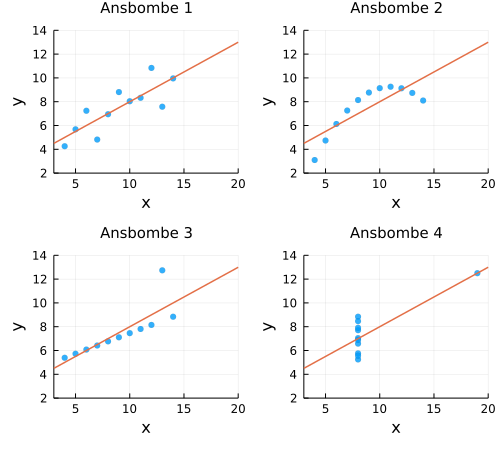

In [13]:
Anscombe_quartet

4つのデータの標本平均 $\xbar$, $\ybar$ と不偏分散 $s_x^2$, $s_y^2$ と不偏共分散 $s_{xy}$ はほぼ一致し, その結果, 回帰直線 $y = \hat\alpha + \hat\beta x$ もほぼ一致する.

このようなデータの場合にコンピュータで回帰直線だけを計算してしまうと, 不適切な回帰分析をしてしまう可能性がある. 

最小二乗法によって回帰直線を求めることが適切なのはAnscombe 1の形のデータだけである.

現実世界で得られるリアルなデータでも, Anscombe 2, 3, 4 のような様子をしている場合がある.

Anscombe 2は直線で近似するには適さない場合である.

何らかの事故によって一度だけ測定ミスが起こるとAnscombe 3のようなデータができあがる.

特別に大きな $x$ の値を持つものが1つだけ含まれているデータはAnscombe 4に似た形になる.

これらのデータは平均, 分散, 共分散のような要約統計量だけを見ても区別をできない.

### 問題: Anscombeの例

[「標本分布について」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/04%20Distribution%20of%20samples.ipynb) にあるAnscombeの例に関する必修問題をまだ解いていない人は解いてみよ.

### データサウルス

データサウルスの例については

* [「条件付き確率分布, 尤度, 推定, 記述統計」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/06%20Conditional%20distribution%2C%20likelihood%2C%20estimation%2C%20and%20summary.ipynb)

の最後の方の問題で紹介した.  データサウルスについては

* https://www.autodesk.com/research/publications/same-stats-different-graphs

に英語による詳しい説明があり, 

* https://visualizing.jp/the-datasaurus-dozen/

に日本語による簡単な解説がある.

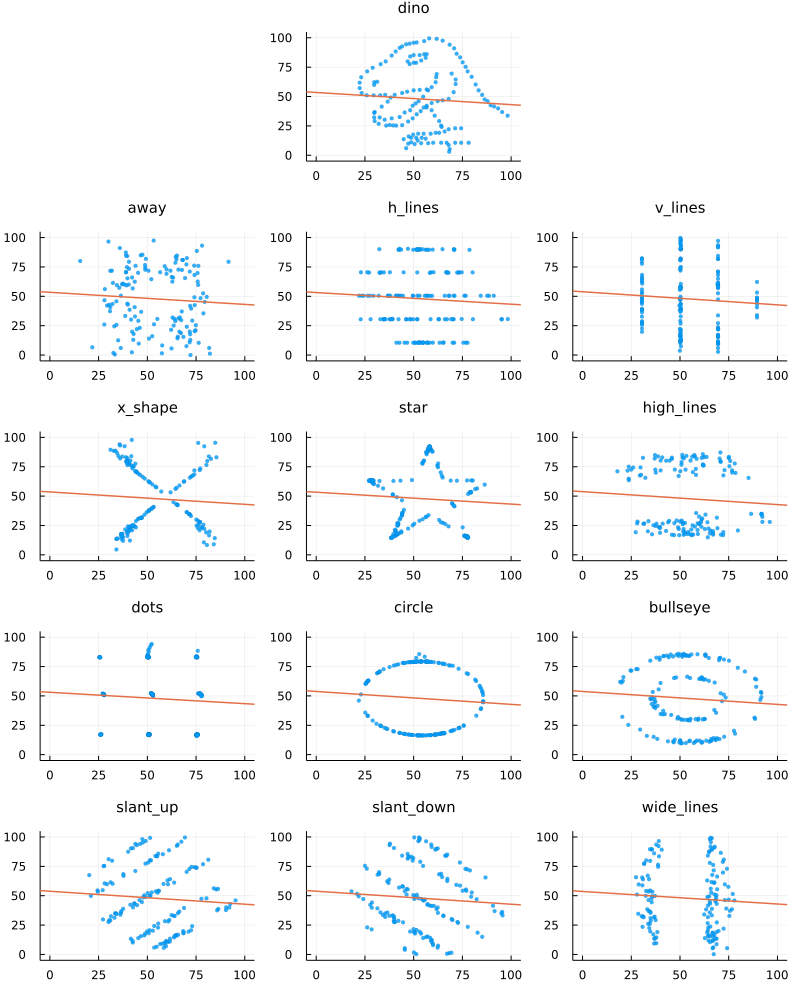

In [14]:
Datasaurus_dozen

以上の13個のデータの標本平均 $\xbar$, $\ybar$ と不偏分散 $s_x^2$, $s_y^2$ と不偏共分散 $s_{xy}$ はほぼ一致し, その結果, 回帰直線 $y = \hat\alpha + \hat\beta x$ もほぼ一致する.

以上のデータの中に最小二乗法によって回帰直線を求めることが適切な場合はない.

左下の "slant_up" のデータでは, 斜めに並んでいる5つのグループごとに傾きは正になっているが, 回帰直線の傾きは負になっている.

このような場合が生じることを俗に __Simpson's paradox__ と言うことがある.

私が読んだ範囲内での __Simpsonのパラドックス__ の「正しい理解の仕方」に関する最良の解説は次のブログ記事である:

* KRSK, [データ分析の不思議、シンプソンのパラドックスを統計的因果推論から考える](https://www.krsk-phs.com/entry/simpsonparadox), 2018-08-31

### 問題: データサウルス

[「条件付き確率分布, 尤度, 推定, 記述統計」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/06%20Conditional%20distribution%2C%20likelihood%2C%20estimation%2C%20and%20summary.ipynb) の最後の方にあるDataSaurusの例に関する問題をまだ解いていない人は解いてみよ.

### 箱ひげ図は十分に大きなサイズの単峰型のデータにのみ使用すること

以下の図は既出のデータサウルスの解説ページ

* https://www.autodesk.com/research/publications/same-stats-different-graphs

の最後の方にある動画のスクリーンショットとして取得したものである.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/histogram-raw-box.png" width=95%>

上段がヒストグラムで中断がなまデータの様子で下段が箱ひげ図(box plot)である.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/raw-box-violin.png" width=80%>

左側がなまデータ(raw data)の様子であり, 真ん中と右側はそれぞれそれに対応する箱ひげ図(box plot)とバイオリンプロット(violin plot)である.

以上の図から, なまデータの様子を見ておくことが必須であることがわかる.

どの場合にも, なまデータの様子が全然違うのに, 箱ひげ図の様子はどれもほぼ同じになってしまっている. 

__箱ひげ図は十分な大きさのサイズを持つ単峰型のデータの場合にのみ適切なグラフの描き方である.__

__さらに, 箱ひげ図に限らず, グラフのもとになったデータのサイズを必ず示しておくべきである.__

「単峰型」とは「山が1つの」という意味である.

右側のバイオリン・プロットは箱ひげ図よりもずっとましだが, なまデータの様子を誤解なく伝えるだけの力はないように見える.

ヒストグラムはなまデータの様子を伝えるためには箱ひげ図やバイオリンプロットよりも適切な方法に成り得るが, 横軸を区切る幅(ビン, bin)の設定に恣意性があり, ビンの恣意性によって誤解を招くグラフを作ってしまう危険性がある.

データの様子をグラフで確認する場合にも, グラフの描き方によって誤解が生じる場合が出て来てしまうことを知っておく必要がある.

### 不適切な箱ひげ図の例

上で紹介した例はサイズは十分に大きいが単峰型でないデータで箱ひげ図を描いた場合(非適切な場合)の例になっている.  サイズが小さ過ぎるデータの箱ひげ図を描いた場合(不適切な場合)の例が

* 藤井良宜, 中学校数学におけるこれからの統計教育, 特集統計教育はどう変わるかII, Rimse (), 理数教育研究所, 2018年10月20日発行, pp.2-6.  https://rimse.or.jp/report/pdf/Rimse23.pdf

のpp.2-6にある. 以下の図はこの文献からの引用である.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/fujii2018-1.png" width=300>

これがなまデータである.  データサイズが小さくて, しかも $5$ に山がもう1つある可能性もあり, 自信を持って単峰型のデータとは言い難い.  しかし, 上の文献ではこのデータに箱ひげ図を適用することを教えるべきだとしている.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/fujii2018-2.png" width=300>

この箱ひげ図による要約によってなまデータの様子を誤解なく伝えられるはずがない.

* この箱ひげ図には重要な情報である標本サイズが記されていない.
* この箱ひげ図を見ても, 7,8,9冊の子が0人であることは分からない.

さらに次のような図も見つかる.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/fujii2018-3.png" width=500>

東北地方, 関東地方, … の各々には数県しか含まれていない.  このように, 各々のグループがほんの数個の数値からなるデータをこのように箱ひげ図で「要約」することは不適切な行為である.

この不適切なグラフの描き方を見れば, データサイズの情報が非常に重要なことも分かる.

### 箱ひげ図などの正しい使い方

以下の表は

* https://twitter.com/T_Weissgerber/status/1087646465374281728

からの引用である.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/TraceyWeissgerber.jpg" width=95%>

例えば, box plot (箱ひげ図)については,

* サンプルサイズが大きい場合に使用
* 単峰型でないデータには使用しない

ということになっており, ベストプラクティス(最良実践)の項目には

* x軸上のグループ名の下にサンプルのサイズも示しておくこと
* ひげが何を表しているかを凡例で示しておくこと

と書いてある.

### ゴリラ

以下の例はこの一連のノート群の中では初めて紹介するものである.  その例は論文

* Itai Yanai & Martin Lercher, [A hypothesis is a liability](https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02133-w), Genome Biology volume 21, Article number: 231 (2020)

で使われた擬似データセットのお話である. 以下で使う図はこの論文からの引用になっている.

論文の著者たちは, 学生達に以下のように伝えた:

>データセットには1786人分のボディマス指数(BMI)とある特定の日にそれぞれが歩いた歩数(steps)が記録されており, 男性と女性について2つのファイル分けて格納されている.

学生に配布したデータセットの様子は以下の通り:

<a href="https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02133-w/figures/1"><img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/gorilla_a.png" width=300></a>

そして, 学生を次の2つのグループに分けた.

1つ目の「仮説あり」の(hypthothesis-focusedの)グループの学生には, 以下の3つの仮説を検討するように求めた.

(i) 男性と女性の平均歩数に統計的に有意な差があること
(ii) 女性では歩数とBMIの間には負の相関があること
(iii) 男性では歩数とBMIの間には正の相関があること

さらに, データセットから結論できることが他にあるかどうかも質問した.

2つ目の「仮説なし」の(hypothesis-freeの)グループの学生には, 単に「データセットから何を結論付けますか?」と質問した.

その結果は以下の通り.

<a href="https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02133-w/figures/1"><img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/gorilla_c.png" width=400></a>

この表の日本語訳:

$$
\begin{array}{|c|c|c|}
\hline
& \text{ゴリラを発見できなかった} & \text{ゴリラを発見した} \\
\hline
\text{仮説ありグループ} & 14 & 5 \\
\hline
\text{仮説なしグループ} &  5 & 9 \\
\hline
\end{array}
$$

「ゴリラを発見できなかった」と「ゴリラを発見した」とは一体どういう意味なのだろうか?

その理由はデータの散布図を描くとわかる!

<a href="https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-02133-w/figures/1"><img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/gorilla_b.png" width=500></a>

学生に課された統計学のレポート課題のデータセットは実は偽物のデータセットであり, 散布図を描くとゴリラの絵が現れるように作られていたのである!

レポートを提出した学生は2つのグループを合わせて33人で, そのうちの過半数の19人がゴリラを発見できなかった.

さらに, (i),(ii),(iii)の3つの仮説を検討するように指示を出された「仮説あり」のグループでは19人中14人もゴリラを発見できなかった! 3つの仮説の検討の指示によって誤誘導されてしまった格好になってしまっている.

このようなレポート課題を出すことは統計学の講義として教育的であり, 学生の側も良い勉強になったと思われる.

### 問題: ゴリラ

[「検定と信頼区間: 比率の比較」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/11%20Hypothesis%20testing%20and%20confidence%20interval%20-%20Two%20proportions.ipynb) の必修計算問題の節の解答例を参照して, 2×2の分割表

$$
\begin{array}{|c|c|c|}
\hline
& \text{ゴリラを発見できず} & \text{ゴリラを発見した} \\
\hline
\text{仮説ありグループ} & 14 & 5 \\
\hline
\text{仮説なしグループ} &  5 & 9 \\
\hline
\end{array}
$$

のデータから「仮説あり」と「仮説なし」の2つのグループでゴリラを発見できない確率(比率)の違いに関ついて以下を求めよ:

1. 仮説「オッズ比パラメータは $\OR = 1$ である」という仮説のWald版P値.
2. オッズ比パラメータ $\OR$ に関するWald版 $95\%$ 信頼区間.

可能ならば以下も求めよ.

3. 仮説「オッズ比パラメータは $\OR = 1$ である」という仮説のPearsonのχ²検定版P値.
4. オッズ比パラメータ $\OR$ に関するPearsonのχ²検定版の $95\%$ 信頼区間.
5. 仮説「オッズ比パラメータは $\OR = 1$ である」という仮説のSterne版Fisher検定のP値.
6. オッズ比パラメータ $\OR$ に関するSterne版Fisher検定の $95\%$ 信頼区間.
7. 仮説「オッズ比パラメータは $\OR = 1$ である」という仮説のClopper-Pearson版Fisher検定のP値.
8. オッズ比パラメータ $\OR$ に関するClopper-Pearson版Fisher検定の $95\%$ 信頼区間.

可能ならばそれぞれの場合のP値函数のグラフをプロットしてみよ.

無理して3から8の小問を解いたり, P値函数のグラフを描いたりする必要はないが, もしもそれらの答えを数値的に求めたり, グラフを描く方法をマスターできたりしたら, 後で役に立つ可能性がある.

これらの問題の解答例はここには書かない.

## 印象操作のためにグラフを利用しない

統計学云々以前の問題として, 印象操作のためにグラフを悪用することはやめた方がよい.

多くの場合に誤った印象を与えることになることで有名なグラフの描き方に3次元円グラフがある. (一般に円グラフはよくないグラフの描き方だとされている.)

### 3次元円グラフは絶対に避ける

3次元グラフがダメな理由および円グラフ一般が良いグラフの描き方ではないことについては

* [3D円グラフ撲滅委員会より、なぜ3D円グラフを使ってはいけないか](https://www.cresco.co.jp/blog/entry/950/)

が見易く読み易い. 以下の図はこのページからの引用である. ただし, 矢線は筆者が追加した.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/ADV18_01.jpg" width=469>

__問題:__ 隣り合っている20代と30代ではどちらの割合が大きいか?

見た目的には圧倒的に30代の割合の方が大きく見えるが, 実際には20代が20%で30代は18%であり, 30代の割合の方が少し小さい.  手前の40代の方が奥側の10代や70代よりも割合が大きく見えるが, 実際にはそうではない.

<img src="https://raw.githubusercontent.com/genkuroki/Statistics/master/2022/images/ADV18_02.jpg" width=471>

このように3次元円グラフは割合について間違った印象を与えるために利用できる!

## 無作為抽出の失敗に注意を払う

「独立同分布」という条件を満たす確率分布を統計モデルとして採用した場合には, 調べたい母集団からの適切な無作為抽出でデータを得ることが適切な統計分析のために必要になる.

しかし, 実際にはそれはそう簡単ではない.

調べたい母集団よりも狭い集団からの偏ったサンプルの抽出になってしまっている危険がいつでも生じる.

そのような例として有名な事例を以下で紹介しよう.

### 1936年のアメリカ大統領選挙の結果の予測の失敗

1936年のアメリカ大統領選挙は民主党のルーズベルトと共和党のランドンの対決になった.

以下の得票率の予測の表は, 鈴木督久『世論調査の真実』(日経BP 日本経済新聞出版本部, 2021年)の図表5-1の孫引きであり, そこには

>(出所) 小山栄三(1946)『輿論調査概要』時事通信社(名称を一部省略)

と書いてある.

$$
\begin{array}{l|c|c}
\hline
& \text{ルーズベルト} & \text{ランドン} \\
\hline
\text{実際の得票率 ($\%$)} & 60.2 & 39.8 \\
\hline
\text{リテラリー・ダイジェスト} & 42.6 & 57.4 \\
\text{ギャラップ} & 54 & 46 \\
\text{フォーチュン} & 74 & 26 \\
\text{クロスレー} & 52 & 48 \\
\text{バルチモア・サン} & 64 & 36 \\
\text{ファーム・ジャーナル} & 43 & 57 \\
\text{グラスルーツ} & 39.5 & 60.5 \\
\hline
\end{array}
$$

ここで, リテラリ―・ダイジェスト, ギャラップ, … は予測を出した主体の名前(会社や雑誌の名前など)である. 

例えば, リテラリ―・ダイジェスト誌は, ルーズベルト候補は $42.6\%$, ランドン候補は $57.4\%$ の票を得て, ランドン候補が勝利するだろうと予想した.  しかし, 実際にはルーズベルト候補が $60.2\%$ の票を得て勝利することになった.

リテラリ―・ダイジェスト誌は, 1936年8月22日号で調査開始を宣言し, 9回にわたる連載で最終的に237万6523票分のアンケート結果を集計して, 上の予測を立てた.

母集団中の6割がルーズベルト支持で残りの4割がランドン支持のとき, 200万人を理想的に無作為抽出したならば, その中のルーズベルト支持者の割合が $43\%$ 以下(86万人以下)になってしまう確率はほぼ $0$ である:

$$
\cdf(\Binomial(2000000, 0.6), 860000) \approx 2\times 10^{-50925}.
$$

このことから, リテラリー・ダイジェスト誌によるアンケート調査には大きな偏りがあったと考えられる.

リテラリ―・ダイジェスト誌が調査対象としていた人達は富裕層が多く, 偏っていたことが問題だった.

この事例から, たとえサイズ200万の __ビッグデータ__ であっても, その内訳が偏っているならば, そのデータを使った予測は大外れしてしまうことがわかる.

In [15]:
setprecision(50) do
    @time sum(pdf(Binomial(2000000, big"0.6"), k) for k in 0:860000)
end

 36.996083 seconds (106.64 M allocations: 3.172 GiB, 4.69% gc time, 0.01% compilation time)


2.0771983651745741e-50925

### 1948年のアメリカ大統領選挙の結果の予測の失敗

以下の表は

* [なるほど統計学園 アメリカ大統領選挙の番狂わせ（後編）標本調査における偏り2](https://www.stat.go.jp/naruhodo/15_episode/episode/senkyo2.html)

にあった表のフォーマットを変えたものである.  そこには

>候補者の当選予想と得票率のグラフ

>（注）上記2人の他にも候補者がいたため、合計は100％にならない。

と書いてある.

$$
\begin{array}{l|c|c}
& \text{民主党 トルーマン} & \text{共和党 デューイ} \\
\hline
\text{実際の得票率 ($\%$)} & 〇49.5 & 45.1 \\
\hline
\text{ギャラップの予想} & 44.5 & 〇49.5 \\
\text{ローバーの予想} & 37.1 & 〇52.2 \\
\text{クロスレーの予想} & 44.8 & 〇49.9 \\
\hline
\end{array}
$$

歴史的には1936年の大統領選挙でルーズベルトが当選することを正しく予測できたギャラップは1948年の大統領選挙では予測に失敗することになった.

ギャラップによる調査方法は無作為抽出法ではなく, 割り当て法であった. 詳しくは上のリンク先を参照して欲しい.

このように, アンケート調査の結果は偏っていることがあり, 信頼できる予測を統計学的な方法で行うためにはデータの取得時に特別な注意が必要になる.

### 選挙の予測に関する参考文献

以上については以下の文献を参考にした.

* なるほど統計学園
  * [アメリカ大統領選挙の番狂わせ（前編）標本調査における偏り1](https://www.stat.go.jp/naruhodo/15_episode/episode/senkyo1.html)
  * [アメリカ大統領選挙の番狂わせ（後編）標本調査における偏り2](https://www.stat.go.jp/naruhodo/15_episode/episode/senkyo2.html)
* 鈴木督久, 『世論調査の真実』, 日経BP 日本経済新聞出版本部, 2021年
<!--  * [『世論調査の真実』　追加の文献・図表・注など](http://www.suzuki-tokuhisa.com/poll/) -->

歴史的には1936年の米大統領選挙の予測についてはギャラップ氏達の予測が有名である. その物語に興味がある人はこれらの文献を参照して欲しい.

## 2つのグループを比較するときの注意

### データは偏っていることが多い

我々は別のノートで「2つのグループの比率の違いは〇〇である」の型の仮説や「2つのグループの平均の違いは〇〇である」の型の仮説に関するP値や信頼区間の計算の仕方について学んだ.

* [検定と信頼区間: 比率の比較](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/11%20Hypothesis%20testing%20and%20confidence%20interval%20-%20Two%20proportions.ipynb)
* [検定と信頼区間: 平均の比較](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/12%20Hypothesis%20testing%20and%20confidence%20interval%20-%20Two%20means.ipynb)

例えば, 風邪をひいた人に薬Xを与えることに効果があるかどうかを知るために, 薬Xを与えたグループと薬を与えずに経過観察したグループに分けて取得した「5日以内に回復した人数」のデータを利用する場合には, 薬Xを与えたかどうか以外の条件が2つのグループで揃っていることが必要である.

風邪症状が重い人達には薬Xを与える傾向が強く, 症状が軽い人達は経過観察する傾向が強い場合には, 薬Xに本当は効き目があったとしても, 重い症状の人達に特に薬Xを与えてしまったせいで, 経過観察グループとの比較で, 回復にかかる日数が平均的に増えてしまうかもしれない.

統計学の現実での応用時にはこのような問題が発生することの方が普通なので注意が必要である.

例えば, 〇〇ウイルス対策としてワクチンを接種したグループと接種しなかったグループを比較するために, 〇〇ウイルスによって重症になった人数を調べたとしよう.

このときもしもワクチンを重症になりやすい人達に優先的に接種しているならば, ワクチンに効き目があったとしても, ワクチン接種群の方が非接種群よりも重傷者の割合が多くなってしまうこともあり得る.

このような問題は, 〇〇ウイルスによって重症になりやすいか否かを完全に無視してワクチン接種するようにすれば解消されるのだが, 人の命を守るために行われるべきワクチン接種ではそういうことは倫理的にするべきではない.

他にも様々な要因でデータが偏ってしまうことがありえる.

特別な場合を除けば, データは必ず偏っており, 問題はその程度がどのくらい重大であるかということになる.

### 2つのグループを比較するときの注意に関する参考資料

次の動画が参考になるだろう.

* 佐藤俊哉, [ランダム化ができないとき](https://youtu.be/tUkyjZXU1vc), 2018年10月25日

同じ著者による次の本も参考になる.

* 佐藤俊哉, 宇宙怪人しまりす　医療統計を学ぶ　検定の巻, 岩波科学ライブラリー 194, 2012年

データの偏りについて語るときの統計学的なキーワードの一つは __交絡__ (confounding)である.  「交絡」の正確な定義を知りたい人は次の講義動画の18:00あたりをみて欲しい.

* 佐藤俊哉, [交絡とその調整](https://youtu.be/ybdkQFEdCPM), 2018年12月20日

## P値や信頼区間の誤用

### P値の定義

データの数値 $x$ とデータの数値の生成のされ方に関するパラメータ $\theta$ を持つ統計モデル $M(\theta)$ と具体的なパラメータ値 $\theta_0$ が与えられたとき, 仮説 $\theta = \theta_0$ のP値はその仮説下での統計モデル $M(\theta=\theta_0)$ 内でデータの数値 $x$ 以上に極端な値が生成される確率またはその近似値として定義される.

「～以上に極端な」や「近似値」の意味を適切に与えるごとにP値の正確な定義が得られる.

例えば, データの数値が「$n$ 回中 $k$ 回成功」の形をしていて, 統計モデル $M(p)$ が試行回数 $n$, 成功確率パラメータ $p$ の二項分布モデルのとき, $p=p_0$ という仮説のClopper-Pearson型のP値は, モデル $M(p=p_0)$ 内でデータの数値 $k$ 以下の値が生成される確率と $k$ 以上の値が生成される確率の小さい方の2倍として定義される. 実際には, P値の値が $1$ を超えないように, その値と $1$ の小さな方として, Clopper-Pearson型のP値が定義される.  具体的に式で書くと以下の通り:

$$
\pvalue_{\CP}(k|n, p=p_0) =
\min
\begin{pmatrix}
1 \\
2\cdf(\Binomial(n, p_0), k) \\
2(1-\cdf(\Binomial(n, p_0), k-1)) \\
\end{pmatrix}.
$$

「～以上に極端な」の大雑把な意味は「モデル内確率分布の平均値 $np_0$ からの距離がデータの数値 $k$ 以上に大きい」という意味に設定しているが, モデルの分布が左右非対称になっていることを考慮してこのような定義になっている.  この他にも

* [「検定と信頼区間: 比率の検定と信頼区間」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/09%20Hypothesis%20testing%20and%20confidence%20interval%20-%20Proportion.ipynb)

では, Sterne型のP値と

* [「大数の法則と中心極限定理」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/05%20Central%20limit%20theorem.ipynb)

で説明した二項分布の中心極限定理(正規分布近似)を使って定義されたP値を2種類定義した(Wilson型, Wald型).

二項分布モデルの場合のそれら4種のP値の定義で使われた考え方は他の統計モデルでのP値を定義するときにも使われる.  その意味で非常に基本的である.

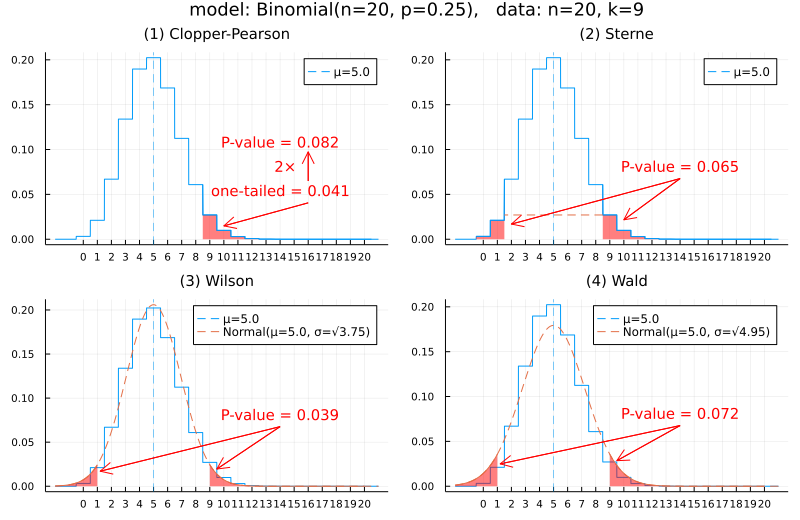

In [16]:
illustrate_binomial_pvalues()

### P値の正しい使い方

__仮説 $\theta = \theta_0$ のP値は, その仮説下での統計モデル $M(\theta=\theta_0)$ とデータの数値 $x$ の整合性の指標として使われる.__

P値が非常に小さい場合には整合性がほとんどないと考える.

P値が $0$ より十分に大きな場合には, モデル $M(p)$ の下での仮説 $p=p_0$ のデータの数値 $x$ との整合性がある程度あると考える.  しかし, 整合性がある程度あることと, そのパラメータ値が真実を表しているかもしれないことは別の話になるので注意すること.

__P値だけから得られる結論は弱い__ という点を強調したいががめに, 「P値は整合性の指標である」と述べていることにも注意せよ!

__例えば, 統計モデルとデータの数値のどちらかに問題があるせいで整合性があるように見えてしまったり, 整合性がないように見えてしまったりすることがあり得る.__

__P値を使った統計的推論は, 使用した統計モデルが妥当でかつ, 用いたデータの数値も信頼できる場合にのみ, 真っ当な結論を出し得る.__

実際には, データが偏っている可能性は常に心配する必要があるし, 使用した統計モデルがそのようなデータの偏りを考慮していない不適切なモデルになっている可能性も常に心配する必要がある.  モデルが妥当でなくなるパターンは多彩である.

__注意:__ 使用している統計モデルが妥当であることの意味は, 目的ごとにユーザー側が決める必要があり, さらに妥当であることの証拠の提出もユーザー側の責任になる.  統計学入門の解説に書いてある統計分析の手続きに機械的に従えば適切な統計的推論が可能になるという考え方は完全に誤りである.  使用した統計モデルの妥当性やデータの数値の信憑性のような重要な事柄については統計学のユーザー側が責任を持つ必要がある.

__注意:__ __P値__ (P-value)はデータの数値とモデル＋パラメータ値の __整合性の指標の1つに過ぎない__.  別の考え方で整合性を測ることもあり得る.  例えば, __尤度__ (likelihood)やその拡張版としてのベイズ統計における __事後分布__ (posterior)の値もデータの数値とモデル＋パラメータ値の整合性の指標とみなされる.  どの道具を使うにしても, 安易に強い結論を出すことを控えて, 検挙になることが重要である.

### 復習: 累積分布函数 cdf と分位点函数 quantile の定義

$X$ が確率分布 $D$ に従う確率変数であるとき, $X\le x$ となる確率 $P(X\le x)$ を $x$ の函数とみなしたものを __累積分布函数__ (cumulative distribution function, cdf)と呼び,

$$
\cdf(D, x) = P(X\le x)
$$

と書くことにしていたのであった.  累積分布函数 $p = F(x) = \cdf(D, x)$ の逆函数 $x = Q(x) = F^{-1}(x)$ (逆函数が存在しない場合には適当に代替物を定義する)を __分位点函数__ (quantile function)と呼び,

$$
p = \quantile(D, x)
$$

のように書くことにしていたのであった.  よく使われる基本的な確率分布について, 累積分布函数 cdf と分位点函数 quantile はコンピュータ上での各種の環境で利用可能な場合が多いので, 便利に利用するとよい.

例えば,

$$
\begin{aligned}
&
\cdf(\Binomial(n, p), k) = \sum_{i=0}^k \binom{n}{i} p^i(1-p)^{n-i},
\\ &
\cdf(\Beta(a, b), k) =
\frac
{\int_0^p t^{a-1}(1-t)^{b-1}\,dt}
{B(a, b)},
\\ &
\cdf(\Normal(0,1), z) = \int_{-\infty}^z \frac{e^{-x^2/2}}{\sqrt{2\pi}}\,dx.
\end{aligned}
$$

In [17]:
@show cdf(Binomial(100, 0.5), 40)
@show 1 - cdf(Beta(40+1, 100-40), 0.5)
@show cdf(Normal(0, 1), (40 - 100*0.5)/√(100*0.5*0.5));

cdf(Binomial(100, 0.5), 40) = 0.02844396682049039
1 - cdf(Beta(40 + 1, 100 - 40), 0.5) = 0.02844396682049044
cdf(Normal(0, 1), (40 - 100 * 0.5) / √(100 * 0.5 * 0.5)) = 0.022750131948179205


In [18]:
@show quantile(Beta(40, 100-40+1), 0.025)
@show quantile(Beta(40+1, 100-40), 0.975)
@show quantile(Normal(0, 1), 0.975);

quantile(Beta(40, (100 - 40) + 1), 0.025) = 0.3032947687028774
quantile(Beta(40 + 1, 100 - 40), 0.975) = 0.5027908495776652
quantile(Normal(0, 1), 0.975) = 1.9599639845400576


### 信頼区間の定義

データの数値 $x$ とデータの数値の生成のされ方に関するパラメータ $\theta$ を持つ統計モデル $M(\theta)$ についてP値 $\pvalue(x|\theta=\theta_0)$ が定義されているとき, 有意水準 $0<\alpha<1$ について, パラメータ $\theta$ に関する信頼度 $1-\alpha$ の信頼区間は, $\pvalue(x|\theta=\theta_0) \ge \alpha$ となるパラメータ値 $\theta_0$ 全体の集合として定義される:

$$
\confint(x|\alpha) = \{\, \theta_0 \mid \pvalue(x|\theta=\theta_0) \ge \alpha \,\}.
$$

例えば, 二項分布モデルのClopper-Pearson型のP値の定義から得られる信頼区間はClopper-Pearsonの信頼区間と呼ばれ, 具体的には,

$$
\begin{aligned}
&
1 - \cdf(\Binomial(n, p_L), k-1) = \alpha/2,
\\ &
\cdf(\Binomial(n, p_U), k) = \alpha/2.
\end{aligned}
$$

によって $p_L, p_U$ を定義することによって得られる区間

$$
[p_L, p_U] = \{\, p_0 \mid p_L\le p_0 \le p_U \,\}
$$

になる.  どうやって $p_L, p_U$ を求めるかが問題になるが, この場合には, 二項分布とベータ分布の累積分布函数のあいだの素晴らしい関係

$$
\begin{aligned}
&
1 - \cdf(\Binomial(n, p), k-1) = \cdf(\Beta(k, n-k+1), p),
\\ &
\cdf(\Binomial(n, p), k) = 1 - \cdf(\Beta(k+1, n-k), p)
\end{aligned}
$$

を使えば, ベータ分布の分位点函数(quantile function, 累積分布函数 cdf の逆函数)を使って,

$$
\begin{aligned}
&
p_L = \quantile(\Beta(k, n-k+1), \alpha/2),
\\ &
p_U = \quantile(\Beta(k+1, n-k), 1-\alpha/2).
\end{aligned}
$$

によって, $p_L, p_U$ を効率的に求められるのであった.

Sterne型のP値に対応する信頼区間の計算はこのようにきれいにはまとまらない.  正規分布近似を使って定義されたP値から得られる信頼区間の計算は標準正規分布の分位点函数の $1-\alpha/2$ での値

$$
z_{\alpha/2} = \quantile(\Normal(0,1), 1-\alpha/2)
$$

の計算に帰着することになる. 二項分布モデルの場合の信頼区間に関する非常に詳しい説明が

* [「検定と信頼区間: 比率の検定と信頼区間」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/09%20Hypothesis%20testing%20and%20confidence%20interval%20-%20Proportion.ipynb)

にある.

二項分布モデルの場合の信頼区間の構成法のパターンは他の統計モデルにおける信頼区間の計算でも同様に使われる.  標準正規分布が $t$ 分布で置き換えられる場合もある.

### 信頼区間の正しい解釈の仕方

P値は __統計モデル内部__ の確率分布におけるデータの数値以上に極端な値が生じる確率またはその近似値であった.

P値は現実における何らかの意味での確率ではなく, 数学的フィクションであるモデル内部における確率またはその近似値であるにすぎない.

ゆえに, 信頼度 $1-\alpha$ の信頼区間すなわち $100(1-\alpha)\%$ の信頼区間における $1-\alpha = 100(1-\alpha)\%$ は __モデル内部__ における確率またはその近似値になる.

すなわち, $X$ をモデル $M(\theta=\theta_0)$ に従う確率変数とするとき, $\pvalue(X|\theta=\theta_0) \ge \alpha$ となる確率は $1-\alpha$ またはその近似値になる.

これは, 信頼度 $1-\alpha$ の信頼区間 $\confint(X|\alpha) = \{\, \theta_0 \mid \pvalue(X|\theta=\theta_0) \ge \alpha \,\}$ に $\theta_0$ が含まれる確率が $1-\alpha$ またはその近似値になることを意味している. 

そのとき, 確率変数 $X$ の値は確率的にランダムに決まると考えるので, その函数である信頼区間 $\confint(X|\alpha)$ も確率的にランダムに決まる.  すなわち区間の両端の点がランダムに決まる.  そのような状況でその区間に定数 $\theta_0$ が含まれる確率が $1-\alpha$ またはその近似値になる.  しかもその確率は数学的フィクションであるモデル内部における確率に過ぎない.

現実の未知の母集団から標本を何度も取り直すことによって $95\%$ 信頼区間の $95\%$ の意味を説明しようとしている解説をよくみかけるが, ミスリーディング(misleading, 誤誘導的)なので注意が必要である. 

__この節における以上の部分もミスリーディングであるという考え方もできる.__

この節での以上の解説では $95\%$ 信頼区間の $95\%$ をどのような確率(またはその近似値)とみなすことができるかを説明した.

確かにそういう知識を持っていた方が良いのだが, __信頼区間については「P値はデータの数値とモデル＋パラメータ値の整合性の指標である」というP値の解釈の基本に戻った方が分かり易い.__

P値から真っ当な結論を出すためには, データの数値が信頼できてかつ, 使用した統計モデルも何らかの意味で妥当でなければいけないのであった.  以下ではこの条件を仮定する.

このとき, パラメータ $\theta$ に関する $100(1-\alpha)\%$ 信頼区間は, 閾値 $\alpha$ によってデータと整合性がないと判断されずにすむパラメータ値 $\theta_0$ 全体の集合になる.

P値から導かれる結論は弱いので, __信頼区間に含まれるパラメータ値についてはその現実における適切さについて判断保留することが正しい.__

例えば, パラメータ $\theta$ がウェブページのデザインAのデザインBに対する優位性の指標であるときに, パラメータ $\theta$ に関する信頼区間については以下のように考える.

(1) 信頼区間がゼロを含むならばデザインAとデザインBは同等の働きをしている可能性を排除できないと考える.

(2) 信頼区間がたとえ正の値を含んでいても, 単にデザインAの方がデザインBよりも優れている可能性を排除できないと考えるだけにとどめ, デザインAの方がデザインBよりも優れているとは安易に結論を出さない.

(3) 信頼区間の左端の値が十分にゼロよりも大きいならば, デザインAの方が優れていると判断できる.  ただし, 上で「以下ではこの条件を仮定する」と述べていたことが重要であることに注意せよ! データが信用できなかったり, モデルが妥当でなかったりする場合にはこのような判断はひどい失敗を招く可能性がある.

### P値の誤用の例

仮想的に, 薬Aを与えた $m$ 人と与えなかった群 $n$ 人について〇〇日以内に回復した人の人数がそれぞれ $a$ 人と $c$ 人というデータが得られたとする.

その状況を2つの二項分布モデルを用いて分析するとする. 薬Aを与えたときに〇〇日以内に回復する確率はパラメータ $p$ でモデル化されており, 与えなかった場合の回復確率はパラメータ $q$ でモデル化されているとする.

そのモデルを使って仮説 $p=q$ のP値が計算されたとする.  (P値の構成法は複数あるがどれか1つを選んでいると仮定する.)

#### P値は仮説が正しい確率ではない

そのP値は「薬Aを与えた場合と与えない場合で〇〇日以内の回復確率は等しい」という仮説が成立する確率ではない.

仮説 $p=q$ のP値の大雑把な定義は「データの数値 $(a/m, c/n)$ 以上に $p=q$ に見える状況から離れた値が $p=q$ という仮説下での2つの二項分布モデル内で生じる確率」である.

P値は仮説が正しい確率では全然ないし, P値はモデル内確率に過ぎない.

__注意:__ 「ベイズ統計では仮説が正しい確率を扱える」と言っている人達がいるが, ベイズ統計における「仮説が正しい確率」はモデル内確率分布である事後分布で測った確率であるに過ぎない.  ベイズ統計においても使用した統計モデルが不適切ならば事後分布で測った確率も信用できないものになる.  P値を使った場合に生じる困難がベイズ統計を使えば解消されるかのような主張は誤りである.

#### 単独のP値のみを使って重要な決定をしてはいけない

事前に有意水準と呼ばれる整合性に関する閾値 $\alpha$ を決めてあったと仮定する(よく使われているのは $\alpha=5\%$).

さらに, データ中の回復者の割合を比較すると薬Aを与えた側の $a/m$ の方が与えなかった側の $c/n$ より大きい状況を仮定する.

(1) 帰無仮説 $p=q$ のP値が有意水準 $\alpha$ 未満になったとする.

そのときP値が $\alpha$ 未満になっただけで, 「薬Aには効き目がある」と判断してはいけない. 

P値以外の他の条件も確認する必要がある.

例えば, データから予想される薬Aの効き目は実生活においては無視できるほど些細な大きさなのに, P値が $\alpha$ 未満になる場合があり得る. 

その他にも注意するべきことが沢山ある.

* データの数値が偏っている可能性も心配する必要がある.
* 使用した統計モデルが不適切な可能性にも配慮する必要がある.

統計学を使った分析は「すっきりしない」結果に終わることが多い. 

分かり易さを求めすぎないように注意が必要である.

特に統計学を「科学的な御墨付きを得るための道具」扱いしてはいけない.

(2) 帰無仮説 $p=q$ のP値が有意水準 $\alpha$ 以上になったとする.

そのときに「統計的に有意ではない」という理由で, 「ゆえに薬Aには効き目がない」と判断してはいけない.

なぜならば, P値が有意水準 $\alpha$ 以上であることは, 仮説 $p=q$ の下での統計モデルとデータの数値の整合性が閾値 $\alpha$ によって無さすぎると判定されないことを意味するに過ぎないからである. 

「ゆえに薬Aには効き目がない」と結論を出すことは誤りで, 「薬Aに効き目があるかどうかを閾値 $\alpha$ によって判定できなかった」と __判断を保留__ しなければいけない.

ある研究においてP値が有意水準 $\alpha$ 以上になったとしても, その後の研究によって「薬Aには十分な大きさの効果がある」という結論が出る可能性があり得る.

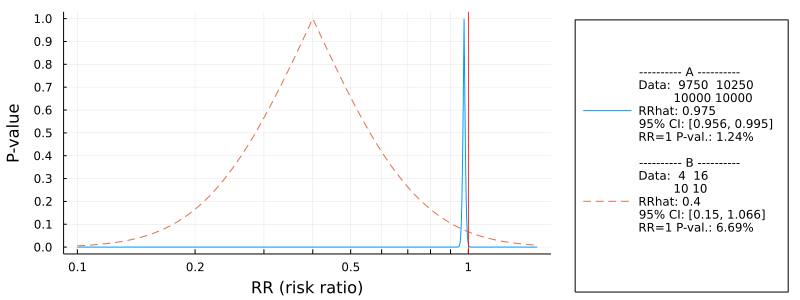

In [19]:
risk_ratio_example1

上のグラフは仮想的なデータに関するP値函数のプロットであり, 薬Aと薬Bの効き目を推定しようとしている状況を想定している.

「薬Aを処方してもリスクは変わらない」という仮説のP値は1.24%で, 有意水準5%で棄却される.  しかし, リスクはほんの少ししか減らないように見える.

「薬Bを処方してもリスクは変わらない」という仮説のP値は6.69%で, 有意水準5%で棄却されない.  しかし, リスクは大きく減る可能性がある. 薬Bについては, 効果の大きさを期待しつつ判断を保留する必要がある.

このようなときに, 「リスクは変わらない」という仮説のP値が5%を切ったかどうかだけで, 薬Aには価値があり, 薬Bには価値がないと判断することは誤りである.

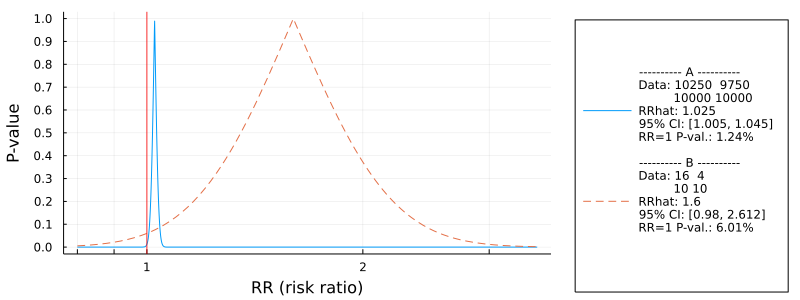

In [20]:
risk_ratio_example2

上のグラフも仮想的なデータに関するP値函数のプロットであり, 物質Aと物質Bにさらされたときのリスクの大きさを推定している状況を想定している.

「物質Aにさらされてもリスクは変わらない」という仮説のP値は1.24%で, 有意水準5%で棄却される. しかし, 物質Aにさらされることによってリスクは少ししか増えないと考えられる.

「物質Bにさらされてもリスクは変わらない」という仮説のP値は6.01%で, 有意水準5%で棄却されない.  しかし, 物質Bにさらされることによってリスクが大きく増える可能性があるかもしれない.  物質Bについては, さらされることのリスクの大きさに注意しながら, 判断を保留し, 必要ならば研究を継続する必要がある.

このようなときに, 「さらされてもリスクは変わらない」という仮説のP値だけを見て, 物質Aにさらされることによって増えるリスクは気にする必要はあるが, 物質Bについては気にする必要はないと考えることは明らかに間違っている.

#### すべてを正直に報告しなければいけない

実際には薬Aだけではなく, 薬B,C,D,…と多数の薬を試してみた場合には, その中でP値が $\alpha=5\%$ 未満になった薬Aのみについて結果を報告するというようなことをしてはいけない.

薬A,B,C,…のすべてに効き目がゼロ(害もゼロ)であるとき, その中の $\alpha=5\%$ についてはデータから計算したP値が $\alpha=5\%$ 未満になる.  有意水準 $\alpha=5\%$ という閾値はかなり緩く, 色々試してみれば容易にP値を $\alpha=5\%$ 未満にできる.

都合の良い結果だけを選択的に報告してしまうと, その研究結果がどれだけどのように信頼できるかが分からなくなってしまう.

自分が所属する研究室のボスが部下に対して, 「統計的に有意になった結果のみを報告すればよい」と指示している場合には, 研究不正を意識的に指示している疑いがあるので, 適切な窓口に相談した方が良いと思われる.

研究室のボスによる不適切な指示に黙って従い続けると, 後に研究不正の協力者とみなされ, 大変なことになるかもしれない.

### P値や信頼区間の誤用に関する参考資料

次の文献は必読である:

* [統計的有意性と P 値に関する ASA 声明](https://www.biometrics.gr.jp/news/all/ASA.pdf), (翻訳: 佐藤俊哉, 2017年4月23日, 英語の原著は2016年)

ただし, この声明における

>2. P 値とは?<br>　おおざっぱにいうと、P値とは特定の統計モデルのもとで、データの統計的要約（たとえば、2グループ比較での標本平均の差）が観察された値と等しいか、それよりも極端な値をとる確率である。

という説明の中の「データ」は「統計モデル内部で生成された仮想的なデータ」であることに注意する必要がある. 次のように言い直した方が誤解が少ないように思われる.

* おおざっぱにいうと, P値とは特定の統計モデル内で生成された仮想的データの統計的要約(たとえば, 2グループでの比較での標本平均の差)が現実で観察されたデータの値以上に極端な値になる確率もしくはその近似値である.

P値に関するASA声明の翻訳者によるP値に関する解説動画が次の場所にある.

* 佐藤俊哉, [仮説検定とP値の誤解](https://youtu.be/vz9cZnB1d1c), 2017年10月19日

分かり難いとよく言われている「信頼区間」については, 検定(もしくはP値函数)と信頼区間の表裏一体性に基いて信頼区間について理解しようとすることが正しい理解の方針で思われる.  検定と信頼区間の表裏一体性については, すぐ上の動画の48:37以降で解説されている.

可能ならば以下の論文も参照せよ:

* Valentin Amrhein, Sander Greenland.  Discuss practical importance of results based on interval estimates and p-value functions, not only on point estimates and null p-values.  First Published June 3, 2022.  \[[doi](https://doi.org/10.1177%2F02683962221105904)\]

この一連のノートの内容はこの論文が出る前に計画されていたのであるが, P値の使い方については内容的に非常に近いものになっている.